Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Load our diabetes dataset

In [2]:
orignal_df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [3]:
orignal_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [4]:
orignal_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
orignal_df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [6]:
def encoder(column,df):
  labels=df[column].unique()
  print(labels)
  label_encoder = LabelEncoder()
  label_encoder.fit(labels)
  encoded_labels = label_encoder.transform(df[column])
  print(encoded_labels)
  return encoded_labels

In [7]:
encoded_df=orignal_df
encoded_df['smoking_history']=encoder('smoking_history',orignal_df)
encoded_df['gender']=encoder('gender',orignal_df)

encoded_df.head()

['never' 'No Info' 'current' 'former' 'ever' 'not current']
[4 0 4 ... 3 4 1]
['Female' 'Male' 'Other']
[0 0 1 ... 1 0 0]


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [8]:
encoded_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
length=len(encoded_df)
print(length)
print(encoded_df.shape)
print(encoded_df.columns)

100000
(100000, 9)
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [10]:
nan_encoded_df=encoded_df
nan_encoded_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [11]:
#introducing null values in my dataframe
np.random.seed(42)
null_percentage = 0.02  # 2% of the values will be null

columns_with_nulls = ['bmi', 'blood_glucose_level','HbA1c_level']

# Calculate the number of null values to introduce in specific columns
num_nulls = int(encoded_df[columns_with_nulls].size * null_percentage)

# Generate random indices for null values in specific columns
null_indices = np.random.choice(encoded_df.index, num_nulls, replace=False)

# Set the selected indices in specific columns to NaN
nan_encoded_df.loc[null_indices, columns_with_nulls] = np.nan

In [12]:
nan_encoded_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140.0,0
1,0,54.0,0,0,0,27.32,6.6,80.0,0
2,1,28.0,0,0,4,27.32,5.7,158.0,0
3,0,36.0,0,0,1,23.45,5.0,155.0,0
4,1,76.0,1,1,1,20.14,4.8,155.0,0


In [13]:
nan_encoded_df.isnull().sum()

gender                    0
age                       0
hypertension              0
heart_disease             0
smoking_history           0
bmi                    6000
HbA1c_level            6000
blood_glucose_level    6000
diabetes                  0
dtype: int64

In [14]:
#dealing with nan values
nan_fill_encoded_df = nan_encoded_df

In [15]:
nan_fill_encoded_df['bmi'] = nan_fill_encoded_df['bmi'].fillna(nan_fill_encoded_df['bmi'].mean())
nan_fill_encoded_df['HbA1c_level'] = nan_fill_encoded_df['HbA1c_level'].fillna(nan_fill_encoded_df['HbA1c_level'].mean())
nan_fill_encoded_df['blood_glucose_level'] = nan_fill_encoded_df['blood_glucose_level'].fillna(nan_fill_encoded_df['blood_glucose_level'].mean())

In [16]:
nan_fill_encoded_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [17]:
nan_fill_encoded_df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.414660,41.885856,0.07485,0.039420,2.179650,27.321419,5.527286,138.083926,0.085000
std,0.493031,22.516840,0.26315,0.194593,1.889659,6.430970,1.038554,39.534302,0.278883
min,0.000000,0.080000,0.00000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.00000,0.000000,0.000000,24.010000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.00000,0.000000,3.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.00000,0.000000,4.000000,29.160000,6.200000,158.000000,0.000000
max,2.000000,80.000000,1.00000,1.000000,5.000000,91.820000,9.000000,300.000000,1.000000


In [18]:
nan_fill_encoded_df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140.0,0
1,0,54.0,0,0,0,27.32,6.6,80.0,0
2,1,28.0,0,0,4,27.32,5.7,158.0,0
3,0,36.0,0,0,1,23.45,5.0,155.0,0
4,1,76.0,1,1,1,20.14,4.8,155.0,0
5,0,20.0,0,0,4,27.32,6.6,85.0,0
6,0,44.0,0,0,4,19.31,6.5,200.0,1
7,0,79.0,0,0,0,23.86,5.7,85.0,0
8,1,42.0,0,0,4,33.64,4.8,145.0,0
9,0,32.0,0,0,4,27.32,5.0,100.0,0


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split the dataset into features and target variable
X = nan_fill_encoded_df.drop('diabetes', axis=1)
y = nan_fill_encoded_df['diabetes']

In [21]:
# Split the dataset into training and testing sets using the 80-20 rule
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [23]:
# Fit additional models
models = [
    DecisionTreeClassifier(),
    LinearRegression(),
    SVC(),
    SVR(),
    GaussianNB(),
    KNeighborsClassifier()
]

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #The Reason Behind Skiping Linear Regression model is the function predict is not available for LR
    if isinstance(model, LinearRegression):
        # Skip the LinearRegression model for accuracy calculation
        continue

    # Convert the continuous predictions to binary labels for classification models
    y_pred = np.where(y_pred > 0.5, 1, 0)

    accuracy = accuracy_score(y_test, y_pred)
    print('Model:', model)
    print('Accuracy:', accuracy)

Model: DecisionTreeClassifier()
Accuracy: 0.92935
Model: SVC()
Accuracy: 0.9385
Model: SVR()
Accuracy: 0.9359
Model: GaussianNB()
Accuracy: 0.8961
Model: KNeighborsClassifier()
Accuracy: 0.941


In [27]:
# Create a list to store the predictions for each model
all_predictions = []

# Prepare the new data for prediction
new_data = pd.DataFrame({
    'gender': ['Female'],
    'age': [80],
    'hypertension':[0],
    'heart_disease':[1],
    'smoking_history': ['never'],
    'bmi': [25.19],
    'HbA1c_level': [6.6],
    'blood_glucose_level': [140]
})

# Encode categorical columns in the new data
new_data['smoking_history'] = encoder('smoking_history', new_data)
new_data['gender'] = encoder('gender', new_data)

# Iterate over the models and make predictions
for model in models:
    # Skip LinearRegression model as it doesn't have predict function
    if isinstance(model, LinearRegression):
        continue

    # Fit the model on the entire dataset
    model.fit(X, y)

    # Make predictions on the new data
    prediction = model.predict(new_data)

    # Convert continuous predictions to binary labels for classification models
    if not isinstance(model, SVR) and not isinstance(model, LinearRegression):
        prediction = np.where(prediction > 0.5, 1, 0)

    # Store the predictions in the list
    all_predictions.append(prediction)

# Print the predictions for each model
for i, model in enumerate(models):
    if i < len(all_predictions):
        print('Model:', model)
        print('Prediction:', all_predictions[i])
        print()
    else:
        print('No prediction available for model:', model)
        print()

['never']
[0]
['Female']
[0]
Model: DecisionTreeClassifier()
Prediction: [0]

Model: LinearRegression()
Prediction: [0]

Model: SVC()
Prediction: [0.13216326]

Model: SVR()
Prediction: [1]

Model: GaussianNB()
Prediction: [0]

No prediction available for model: KNeighborsClassifier()



In [28]:
# Import the necessary libraries
import matplotlib.pyplot as plt

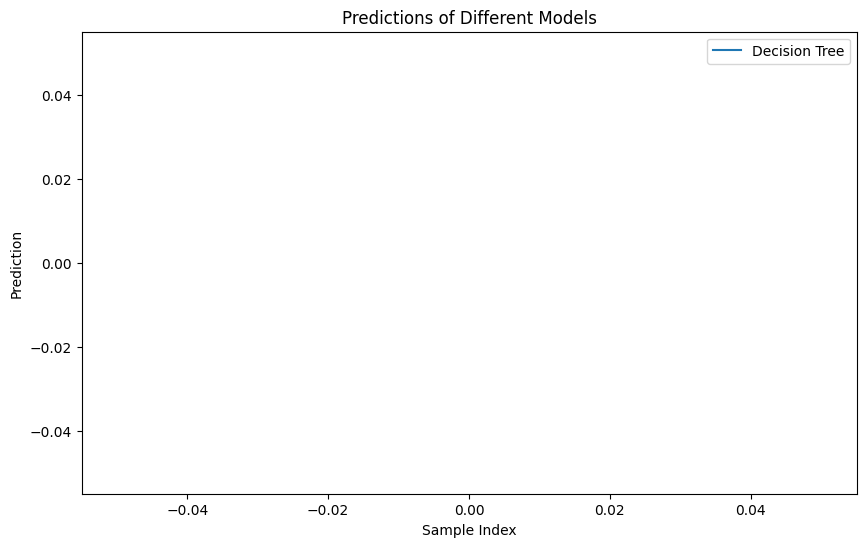

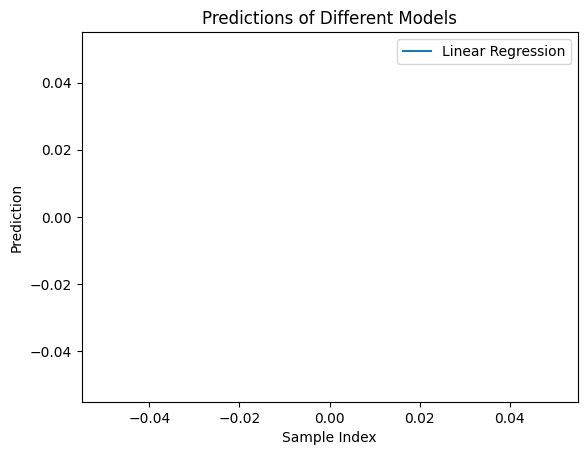

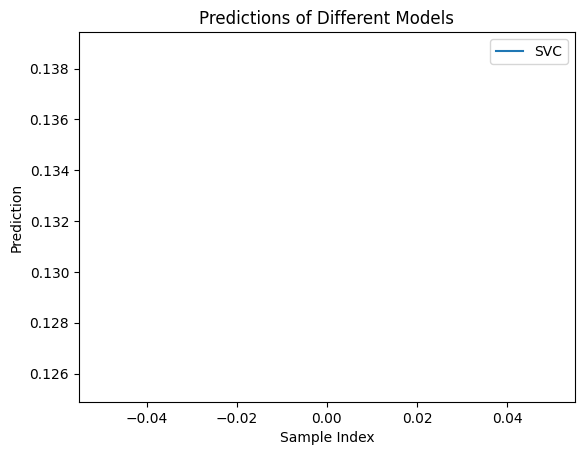

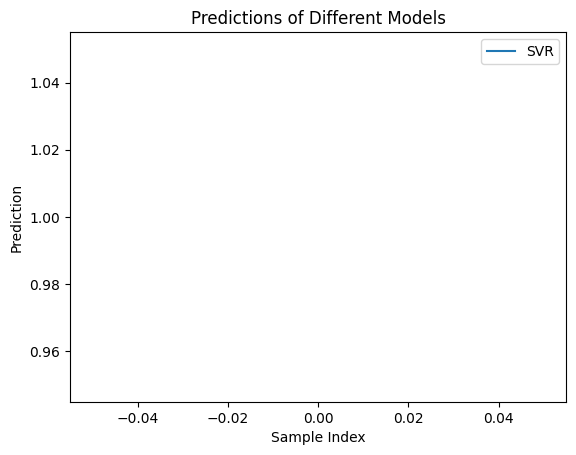

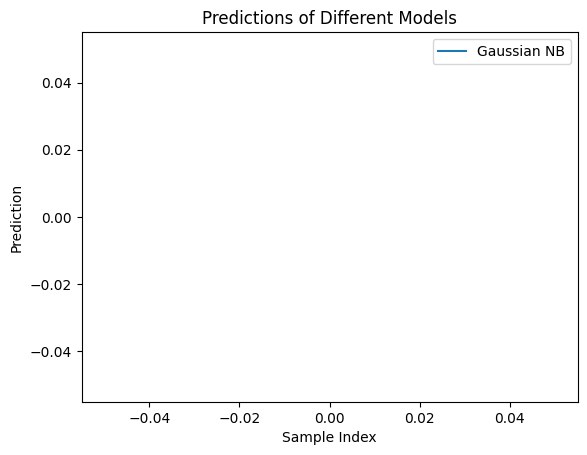

No graph available for model: KNeighborsClassifier()



In [32]:
# Create a list of model names for labeling the graph
model_names = ['Decision Tree', 'Linear Regression', 'SVC', 'SVR', 'Gaussian NB', 'KNN']

# Plot the predictions for each model
plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
  if i < len(all_predictions):
    plt.plot(new_data.index, all_predictions[i], label=model_names[i])
    # Set the labels and title of the graph
    plt.xlabel('Sample Index')
    plt.ylabel('Prediction')
    plt.title('Predictions of Different Models')
    plt.legend()

    # Display the graph
    plt.show()
  else:
    print('No graph available for model:', model)
    print()